# Summer 2022 Data Science Intern Challenge
# Question 1 Analysis

In this program, I will provide the process and work for the calculation of the AOV based on the prepared data set about sneaker shop orders. (Summary of answers of both Question1 1 and Question 2 will be given at the end of this page)


# 1. Analysis on the dataset

The given data set called '2019 Winter Data Science Intern Challenge Data Set.csv' is used for the following analysis. The problem was that the average order value (AOV) was calculated but it seemed long.
<br>
<br>First, let's look at the data as below. As you can see, the data has 5000 rows with different relative columns

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
print(df.shape)
print(df.info())
df

(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


But when you see below, the mean value is 3145.1280. Thus, the given value from Shopify team was based on that number. The value of average is not always correct because few data can make an impact on the average value. Especially value like AOV in order to measure revenue in orders, few orders with too high order amount can increase AOV even though majority orders have lower order amount. So, let's find out how we can correct this situation.

In [73]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

First, let's try what the Skewness value is for 'order_amount' column before we identify outliers. Skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

The skewness value of 'order_amount' is 16.675033 as below. It indicates that there are extreme values that potentially affect the average that we calculated.


In [74]:
print(df.skew())


order_id         0.000000
shop_id          0.013830
user_id         -0.034052
order_amount    16.675033
total_items     17.065556
dtype: float64


C:\Users\JONGWO~1\AppData\Local\Temp/ipykernel_23908/3212328798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


# 2. Identifying Outliers

Now we know there are some outliers for caculating of AOV. So, let's find out.
Below graph is Box Plot of 'order_amount'. The box plot is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). So we can easily detect the outliers by looking into the graph. Also refering to scatter plot, it seems like around '700000' and 100000' look sucpicious. 

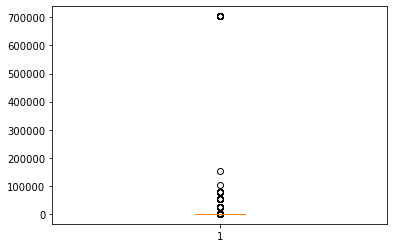

In [75]:
plt.boxplot(df['order_amount'])
plt.show()

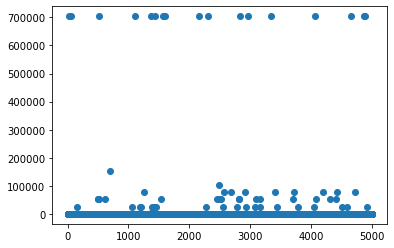

In [76]:
plt.scatter(df['order_id'], df['order_amount'])
plt.show()

We already know that there could be outliers in a specific high range from our previous analysis. 
<br>We can group by 'order amount' as shown in the below table and we can point out there is a sudden increase from the order amount '25725'. Thus, we can filter data and look into more details for this range.

In [77]:
df_sort=df.groupby('order_amount', sort=True).size()
df_sort.sort_index(ascending = False).head(15)

order_amount
704000    17
154350     1
102900     1
77175      9
51450     16
25725     19
1760       1
1408       2
1086       1
1064       1
1056       3
980        1
965        1
960        2
948        1
dtype: int64

As shown below, there were orders from shop_id '42'. They all were purchased at 4am, same amount of price and same quantities under same user_id '607'
This customer could be a VIP customer, however, we need to check if these transections are for reselling or other immoral purposes. Also, these orders are outliers and have affected to AOV much higher. Thus, can get rid of the orders to calculate AOV.

In [78]:
df_outlier1 = df[(df['order_amount'] >= 600000) & (df['order_amount']< 800000)]
df_outlier1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In below filtered data, we can find out all orders proceeded under the shop_id '78'. Eventhough the total quantities and users are different, the order amount for one shoes is 25725. it seems too high considering the fact that shoes price is affordable. It indicates that there could be typing or entering error for the shoes price. We need to substract these sub dataset and find out what the problem is.
Also, these transactions effect the AOV higher, so we need to calculate AOV without the orders below.

In [79]:
df_outlier2 = df[(df['order_amount'] >= 10000) & (df['order_amount']< 600000)]
df_outlier2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


# 3. Outlier Handling - Trimming
We identified outliers and now we have to handle those outliers to calculate more accurate AOV. Those outliers should be handled separately. They could be potentially critical problems or good leads generating highe revenue. The outliers we detected with filters are as below. We removed them from the original dataset, so the total order numbers changed from 5000 to 4937. As you can see, the average is 302.5805 and the skewness of 'order_amount' is 1.2524. Now we can say the AOV is 302.58 and the data is normally distributed without any significant outliers.

In [84]:
df_no_outlier = df
index = df_no_outlier[(df_no_outlier['order_amount'] >= 600000) & (df_no_outlier['order_amount']< 800000)].index
df_no_outlier.drop(index, inplace=True)

index = df_no_outlier[(df_no_outlier['order_amount'] >= 10000) & (df_no_outlier['order_amount']< 600000)].index
df_no_outlier.drop(index, inplace=True)

df_no_outlier['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

In [83]:
print(df_no_outlier['order_amount'].skew())

1.2524164773783135


# Question1 - Summary

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
<br>Average Order Value could be miscalculated since few data points with significant far from median value can make an considerable impact on the average value. 
<br>Especially value like AOV in order to measure revenue of orders, few orders with too high order amount can increase AOV even though majority orders have lower order amount. We need to consider outliers to get a more accurate AOV.

b.	What metric would you report for this dataset?
<br> I would use skewness to check whether the data is normally distributed and the data has outliers. And I would report a box plot, scatter plot to detect the potential outliers. Finally, I would look into the potential outliers in the dataset for more details, get rid of those outliers, and calculate more accurate AOV again.

c.	What is its value?
<br>
302.58


# Question2 - Summary

a.	How many orders were shipped by Speedy Express in total?
<br>Answer:54
<br>SELECT COUNT(*) AS NumberOfOrders
<br>FROM Orders AS o
<br>JOIN Shippers AS s ON o.ShipperID = s.ShipperID 
<br>WHERE ShipperName = 'Speedy Express';

b.	What is the last name of the employee with the most orders?
<br>Answer:Peacock
<br>SELECT e.LastName, COUNT(*) AS Count
<br>FROM Orders AS o
<br>JOIN Employees AS e ON o.EmployeeID = e.EmployeeID
<br>GROUP BY o.EmployeeID
<br>ORDER BY Count DESC
<br>LIMIT 1;


c.	What product was ordered the most by customers in Germany?
<br>Answer:Boston Crab Meat
<br>SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity
<br>FROM (((Orders AS o
<br>JOIN OrderDetails AS od ON od.OrderID = o.OrderID)
<br>JOIN Customers AS c ON c.CustomerID = o.CustomerID)
<br>JOIN Products AS p ON od.ProductID = p.ProductID)
<br>WHERE c.Country = 'Germany' 
<br>GROUP BY p.ProductID
<br>ORDER BY TotalQuantity DESC
<br>LIMIT 1;

